# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [64]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect(r"db\Market.db")

# TODO: Set up the cursor
cursor = conn.cursor()


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [66]:
# TODO: Write a SQL query which will answer the question above.
#cursor.execute ("SELECT * FROM Price")

cursor.execute("""
 SELECT COUNT(productname)
FROM Products
WHERE Price < 10 ;

""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [67]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""
 SELECT Country, COUNT(*) AS count
FROM Suppliers
 GROUP BY Country
    ORDER BY count DESC
""")


# TODO: Fetch your list of tuples and print it out
most_common_country = cursor.fetchall()
print("Most common country of origin:", most_common_country, "suppliers")

Most common country of origin: [('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)] suppliers


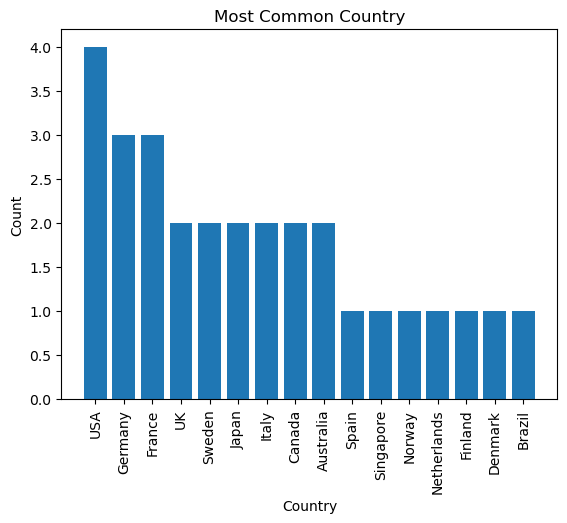

In [68]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(most_common_country, columns=['Country', 'count'])

# TODO: Generate a visualization on this dataframe
# 
# Data for the bar plot

# Create the bar plot
plt.bar(df['Country'], df['count'])


# Add labels and a title (optional but recommended)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Most Common Country')
plt.xticks(rotation=90)

# Display the plot
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [69]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
 SELECT Country, COUNT(*) AS count
FROM Customers
 GROUP BY Country
    ORDER BY count DESC
""")


# TODO: Fetch your list of tuples and print it out
most_common_country_customer = cursor.fetchall()
print("Most common country of origin:", most_common_country_customer, "Customers")

Most common country of origin: [('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)] Customers


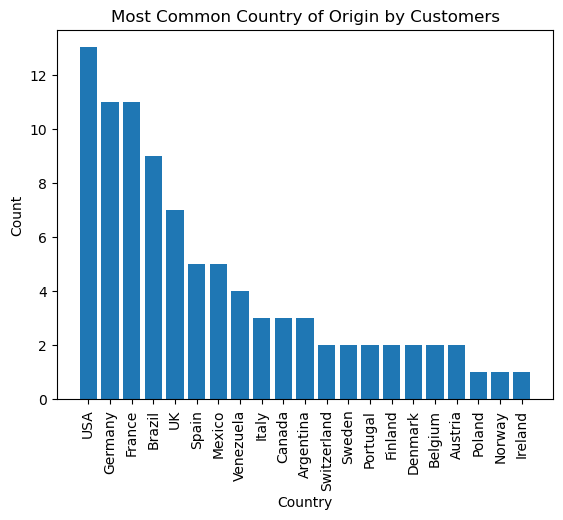

In [70]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(most_common_country_customer, columns=['Country', 'Count'])
#On OrderDetails.ProductID = Products.ProductID

# TODO: Generate a visualization on this dataframe
plt.bar(df['Country'], df['Count'])


# Add labels and a title (optional but recommended)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Most Common Country of Origin by Customers')
plt.xticks(rotation=90)
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [71]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
 SELECT 
    OrderDetails.ProductID,
    Sum(OrderDetails.Quantity),
    Products.ProductName
FROM OrderDetails
LEFT JOIN Products ON OrderDetails.ProductID = Products.ProductID
GROUP BY Products.ProductName
ORDER BY OrderDetails.Quantity ASC
LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
least_popular_products = cursor.fetchall()
print("Least Popular Products", least_popular_products, "Products")

Least Popular Products [(37, 39, 'Gravad lax'), (19, 181, 'Teatime Chocolate Biscuits'), (56, 269, 'Gnocchi di nonna Alice'), (68, 199, 'Scottish Longbreads'), (25, 71, 'NuNuCa Nuß-Nougat-Creme'), (67, 5, 'Laughing Lumberjack Lager'), (72, 270, 'Mozzarella di Giovanni'), (22, 18, "Gustaf's Knäckebröd"), (32, 52, 'Mascarpone Fabioli'), (63, 209, 'Vegie-spread'), (14, 152, 'Tofu'), (64, 167, 'Wimmers gute Semmelknödel'), (41, 139, "Jack's New England Clam Chowder"), (13, 92, 'Konbu'), (42, 77, 'Singaporean Hokkien Fried Mee'), (21, 147, "Sir Rodney's Scones"), (29, 168, 'Thüringer Rostbratwurst'), (54, 280, 'Tourtière'), (18, 106, 'Carnarvon Tigers'), (77, 108, 'Original Frankfurter grüne Soße')] Products


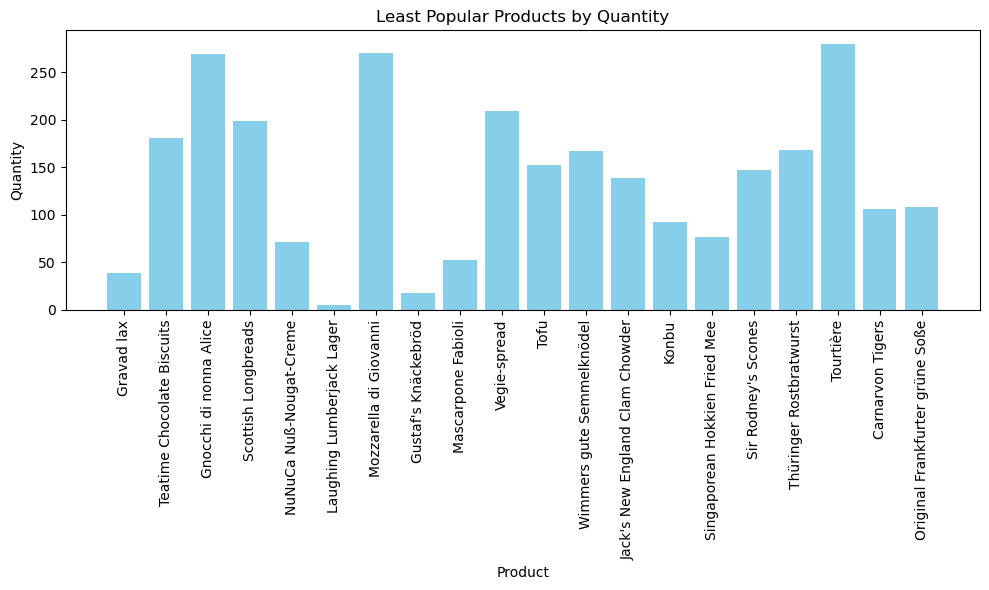

In [72]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(least_popular_products, columns=['ProductID', 'Quantity', 'ProductsName'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
plt.bar(df['ProductsName'], df['Quantity'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Least Popular Products by Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [73]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""
    SELECT 
    OrderDetails.ProductID, Products.ProductName, OrderDetails.Quantity,
    (OrderDetails.Quantity*Products.Price) AS "total revenue",
    Products.Price 
    FROM OrderDetails
    INNER JOIN Products ON OrderDetails.ProductID = Products.ProductID
    GROUP BY Products.ProductName
    ORDER BY "total revenue" 
    ASC LIMIT 10;
""")

# TODO: Fetch your list of tuples and print it out
least_popular_products_by_revenue = cursor.fetchall()
print("Least Popular Products by Revenue", least_popular_products_by_revenue, "total revenue")

Least Popular Products by Revenue [(19, 'Teatime Chocolate Biscuits', 1, 9.2, 9.2), (37, 'Gravad lax', 1, 26, 26), (68, 'Scottish Longbreads', 3, 37.5, 12.5), (25, 'NuNuCa Nuß-Nougat-Creme', 4, 56, 14), (13, 'Konbu', 10, 60, 6), (33, 'Geitost', 25, 62.5, 2.5), (24, 'Guaraná Fantástica', 15, 67.5, 4.5), (67, 'Laughing Lumberjack Lager', 5, 70, 14), (54, 'Tourtière', 10, 74.5, 7.45), (56, 'Gnocchi di nonna Alice', 2, 76, 38)] total revenue


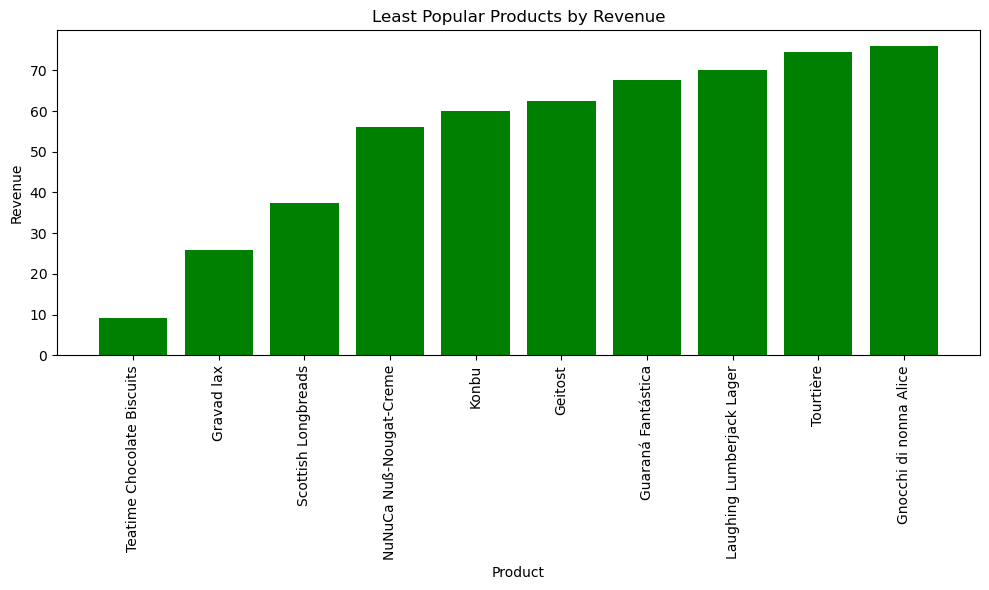

In [74]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(least_popular_products_by_revenue, columns=['ProductID', 'ProductName','Quantity','total revenue','Price'])

df
# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
plt.bar(df['ProductName'], df['total revenue'], color='green')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Least Popular Products by Revenue')
plt.xticks(rotation=90)
plt.tight_layout()



### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [75]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""
SELECT 
    Suppliers.Country, 
    SUM(OrderDetails.Quantity) AS TotalQuantity
FROM Suppliers
JOIN Products ON Suppliers.SupplierID = Products.SupplierID
JOIN OrderDetails ON Products.ProductID = OrderDetails.ProductID
GROUP BY Suppliers.Country

""")

# TODO: Fetch your list of tuples and print it out
most_orders_by_country = cursor.fetchall()
print("Most Orders By Country", most_orders_by_country, "TotalQuantity")

Most Orders By Country [('Australia', 1610), ('Brazil', 158), ('Canada', 949), ('Denmark', 160), ('Finland', 448), ('France', 1436), ('Germany', 1339), ('Italy', 1217), ('Japan', 560), ('Netherlands', 171), ('Norway', 836), ('Singapore', 391), ('Spain', 209), ('Sweden', 465), ('UK', 1213), ('USA', 1581)] TotalQuantity


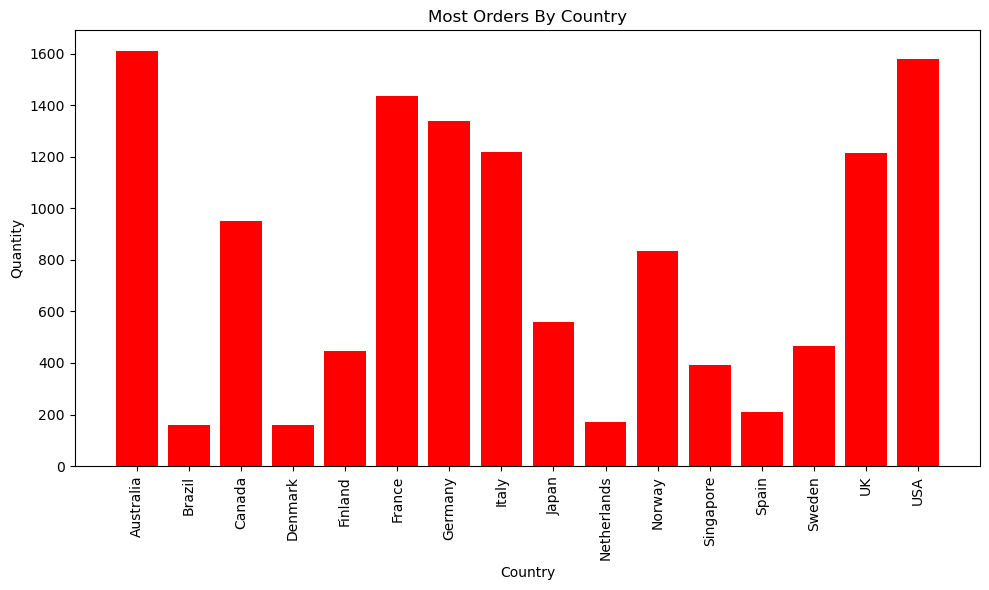

In [76]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(most_orders_by_country, columns=['Country','Quantity'])


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['Quantity'], color='red')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Most Orders By Country')
plt.xticks(rotation=90)
plt.tight_layout()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [77]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute(""" 
SELECT   
    Customers.Country, 
    COUNT(Customers.CustomerID) AS CustomersWithNoOrders
FROM Customers
LEFT JOIN Orders ON Customers.CustomerID = Orders.CustomerID
WHERE Orders.CustomerID IS NULL
GROUP BY Customers.Country
ORDER BY CustomersWithNoOrders DESC;
""")
               
# TODO: Fetch your list of tuples and print it out
country_customers_with_no_orders = cursor.fetchall()
print("Countries With No Orders", country_customers_with_no_orders, "CustomersWithNoOrders")

Countries With No Orders [('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)] CustomersWithNoOrders


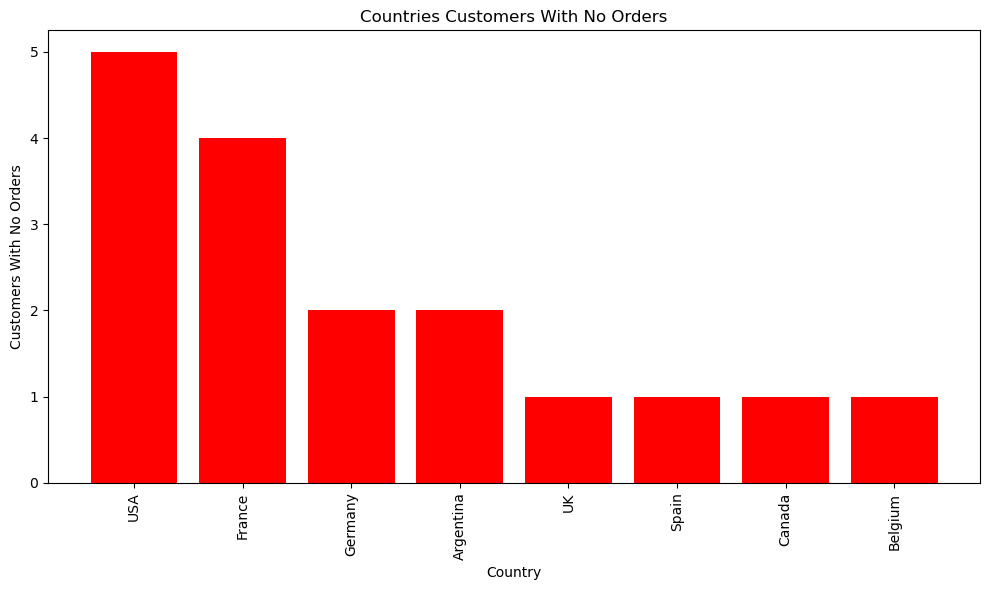

In [78]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(country_customers_with_no_orders, columns=['Country','CustomersWithNoOrders'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['CustomersWithNoOrders'], color='red')
plt.xlabel('Country')
plt.ylabel('Customers With No Orders')
plt.title('Countries Customers With No Orders')
plt.xticks(rotation=90)
plt.tight_layout()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [79]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""  
SELECT 
    Suppliers.SupplierName,
    COUNT(*) AS OrderCount
FROM (
    SELECT 
        OrderDetails.OrderID,
        Products.SupplierID
    FROM OrderDetails
    JOIN Products ON OrderDetails.ProductID = Products.ProductID
) AS ProductOrders
JOIN Suppliers ON ProductOrders.SupplierID = Suppliers.SupplierID
GROUP BY Suppliers.SupplierName
ORDER BY OrderCount DESC;
""")


# TODO: Fetch your list of tuples and print it out
most_popular_suppliers_by_orders = cursor.fetchall()
print("Most Popular Suppliers By Orders", most_popular_suppliers_by_orders, "OrderCount")

Most Popular Suppliers By Orders [('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 19), ('New England Seafood Cannery', 17), ("Mayumi's", 17), ('Leka Trading', 17), ('Bigfoot Breweries', 16), ('Heli Süßwaren GmbH & Co. KG', 15), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Svensk Sjöföda AB', 14), ('Tokyo Traders', 12), ('Refrescos Americanas LTDA', 11), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('Lyngbysild', 8), ('PB Knäckebröd AB', 6), ("Grandma Kelly's Homestead", 6), ('Zaanse Snoepfabriek', 4), ('Escargots Nouveaux', 4)] OrderCount


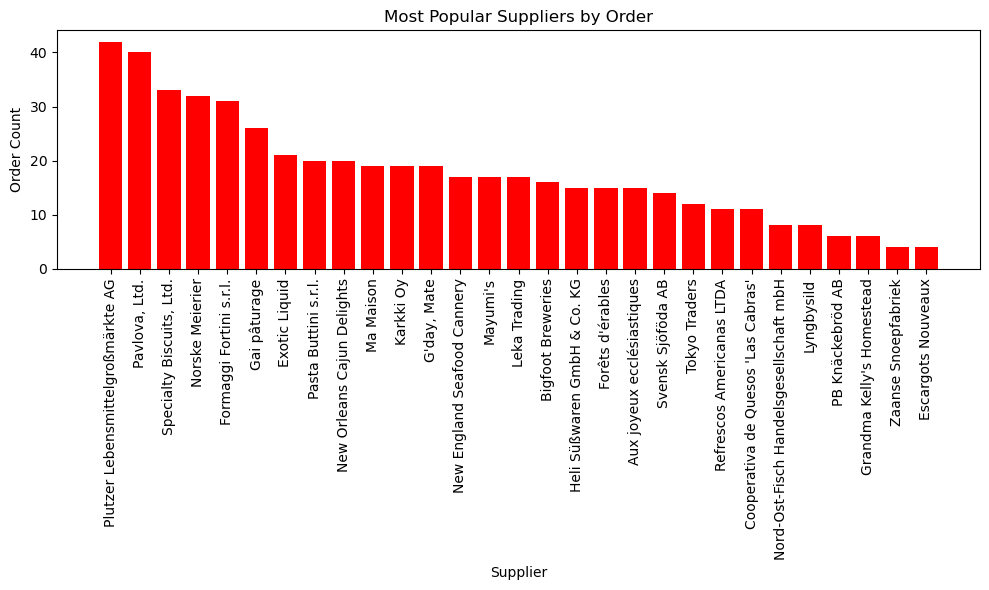

In [80]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(most_popular_suppliers_by_orders, columns=['SupplierName','OrderCount'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
plt.bar(df['SupplierName'], df['OrderCount'], color='red')
plt.xlabel('Supplier')
plt.ylabel('Order Count')
plt.title('Most Popular Suppliers by Order')
plt.xticks(rotation=90)
plt.tight_layout()

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

Australia, Germany, France and USA has the greatest number of customers by order. Of those countries Germany and France hold some of the highest suppliers by country. This is not a significant correlation. The most suppliers by order graph and most orders by country by order graph supports this evidence.

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

Laughing Lumberjack Lager is the least popular product by order quantity. This correlates with revenue because it indicates that the lower the popularity the more revenue said product will bring. The graph "Least Popular Products by Quantity" and "Least Popular Products by Revenue" support this evidence. 

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

Australia has the most orders. This correlates with the number of customers who do not order beecause Australia is not a country that has customers who do not order. The graph with "Most Orders by Country" and "Countries With No Orders" support this evidence.   

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

Plutzer Lebensmittelgroßmärkte AG has the most orders. The graph "Most suppliers by Orders" support this answer.